In [35]:
# qui va au hellfest ou non
import pandas as pd

# 6 personnes
data = {
    'age' :             [22,30,25,35,19,5],
    'like_music' :      [1,0,0,1,1,1],
    'friends_go_party': [1,0,1,0,1,0],
    'go_party':         [1,0,1,1,0,0]
}

df = pd.DataFrame(data)


In [36]:
from sklearn.model_selection import train_test_split

# critères de base
x = df[['age', 'like_music', 'friends_go_party']]

# Critère à prédire
y = df['go_party']

# splitter les données : 80% de training /20% de test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [37]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

# faire un Tree Classifier
tree_1 = DecisionTreeClassifier()

# l'entrainer
tree_1.fit(x_train, y_train)

DecisionTreeClassifier()

In [38]:
# tester sur une personne
new_person= pd.DataFrame(
    [[28,1,0]],
    columns=['age', 'like_music', 'friends_go_party'])

# faire une prédiction sur cette personne
pred_1 = tree_1.predict(new_person)

print(f'{new_person}')
print(f'Cette personne va au Hellfest : { "oui" if pred_1 else "non"}')

   age  like_music  friends_go_party
0   28           1                 0
Cette personne va au Hellfest : oui


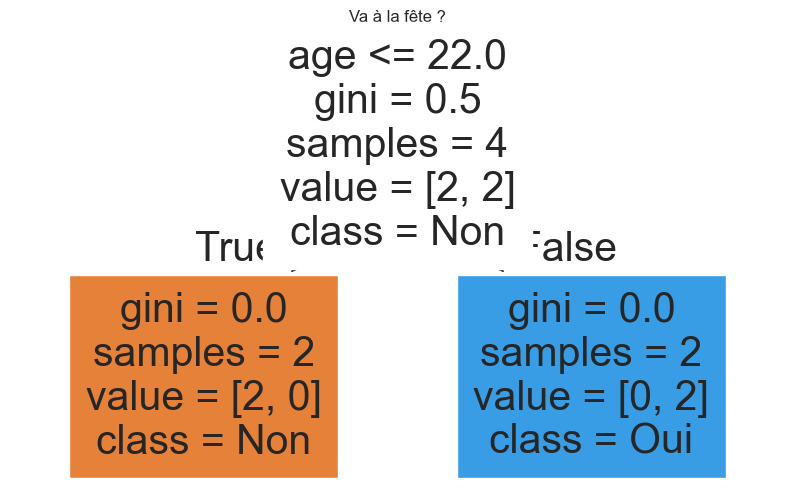

In [39]:
import matplotlib.pyplot as plt

# 6. Affichage graphique de l'arbre pour débugger avec plot_tree
plt.figure(figsize=(10,6))
plot_tree(tree_1, feature_names=['age', 'like_music', 'friends_go_party'], class_names=['Non', 'Oui'], filled=True)
plt.title("Va à la fête ?")
plt.show()

# le modèle se base QUE sur l'age (<22 ans) pour savoir va à la fête
# il faut lui donner plus de données pour qu'il prenne plus de params en compte

In [40]:
from sklearn.metrics import mean_squared_error

# faire le mse
prediction_quality = tree_1.predict(x_test)
mse = mean_squared_error(y_test, prediction_quality)

print(f'MSE = {mse}')

MSE = 1.0


In [43]:
# faire l'accuracy
accuracy = accuracy_score(y_test, prediction_quality) # 0.7709
print(f"Accuracy sur les données de test : {accuracy:.4f}")


Accuracy sur les données de test : 0.0000
